In [50]:
import numpy as np
from scipy.io.wavfile import read, write
from scipy import signal
from scipy.signal import butter, lfilter, freqz
from scipy.fftpack import fft, ifft
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
%matplotlib inline

In [51]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='bandstop')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

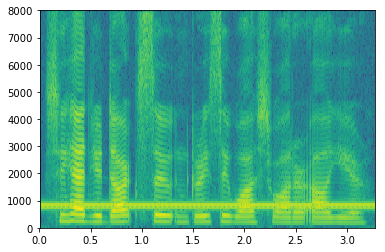

In [52]:
fr, dt = read('Narrow/SA21S.wav')
dt = np.float32(dt)
_,_,_, im = specgram(dt, Fs=fr)

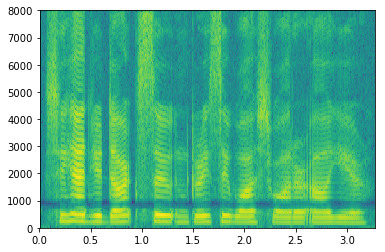

In [57]:
lowcut, highcut = 600.0, 1100.0
y = butter_bandpass_filter(dt, lowcut, highcut, fr, order=7)
_,_,_, im2 = specgram(y, Fs=fr)
im2
y = np.int16(y)
write('test2.wav',fr, y)